In [35]:
import sys
import os
import numpy as numpy
from collections import Counter
# Add the directory containing DecisionTree.py to Python's path
sys.path.append(os.path.join(os.getcwd(), 'Random-forest'))

# Import the DecisionTree class
from DecisionTree import DecisionTree
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [36]:
class RandomForest:
    def __init__(self,n_trees=10,max_depth=10,min_samples_split=2,n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feature = n_feature
        self.trees = []

    def _bootstrap_samples(self, X, y):
        """Create bootstrap samples using random sampling with replacement"""
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]
    
    def fit(self,X,y):
        self.trees=[]
        for _ in range(self.n_trees):
            tree= DecisionTree(max_depth=self.max_depth,
                              min_samples_split=self.min_samples_split,
                              n_features=self.n_feature)
            X_sample,y_sample=self._bootstrap_samples(X,y)
            tree.fit(X_sample,y_sample)
            self.trees.append(tree)
   
    def _most_common_label(self,y):
        counter=Counter(y)
        most_common=counter.most_common(1)[0][0]
        return most_common
    def predict(self,X):
        predictions=np.array([tree.predict(X) for tree in self.trees])
        tree_preds= np.swapaxes(predictions,0,1)
        predictions=np.array([self._most_common_label(tree_pred) for tree_pred in tree_preds])
        return predictions

In [37]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

0.9385964912280702


Accuracy: 0.95


/tmp/ipykernel_8130/2047276166.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=50, label='True Labels')


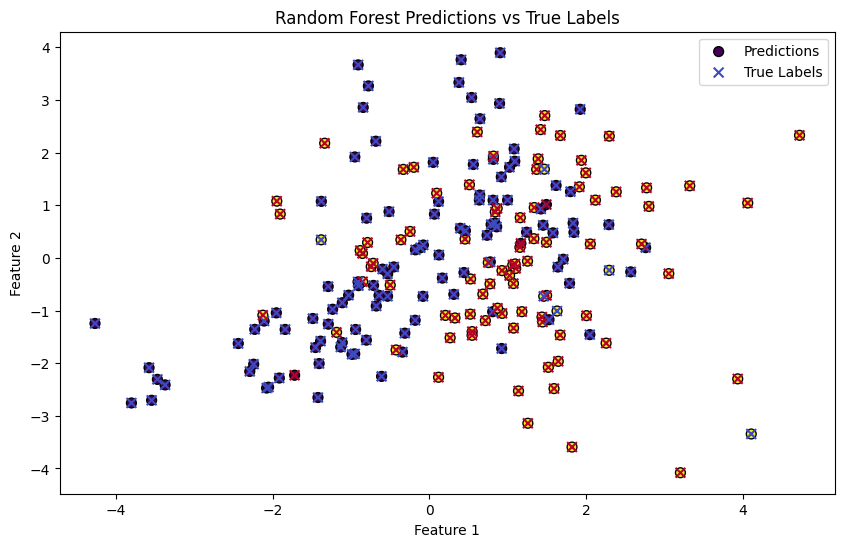

In [38]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForest(n_trees=20, max_depth=10, min_samples_split=2, n_feature=None)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='o', edgecolor='k', s=50, label='Predictions')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=50, label='True Labels')
plt.title('Random Forest Predictions vs True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()